In [11]:
import pygad
import numpy as np
import gym
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v2", render_mode="rgb_array")
env.reset(seed=42)

def fitness_func(solution, sol_idx):
    global env

    fitness = 0
    observation, info = env.reset(seed=42)

    for i in range(solution.shape[0]):
        action = solution[i]
        observation, reward, terminated, truncated, info = env.step(action)

        fitness += reward

        if terminated or truncated:
            observation, info = env.reset(seed=42)
    return fitness


In [12]:
# parameters of the GA
num_generations = 100
num_parents_mating = 4
sol_per_pop = 30
num_genes = 250
gene_space = np.array([0, 1, 2, 3])
gene_type = int
init_range_low = 0
init_range_high = 4
parent_selection_type = "sss"
keep_parents = 3
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10


# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            gene_type=gene_type,
                            init_range_low=init_range_low,
                            init_range_high=init_range_high,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes)

# Running the GA to optimize the parameters of the function.
ga_instance.run()


Parameters of the best solution : [0 3 2 0 0 1 2 1 1 0 0 3 2 1 2 2 2 0 1 0 0 1 3 1 0 0 3 2 0 0 3 2 1 2 2 2 1
 1 2 2 0 3 2 0 0 2 0 2 1 1 2 1 3 1 0 0 0 1 3 2 1 1 2 2 2 2 3 0 1 3 0 1 2 3
 2 3 0 3 0 2 3 2 3 0 0 2 0 3 0 3 1 1 2 1 3 1 1 2 1 1 2 1 2 0 3 0 1 0 0 0 0
 1 3 1 2 0 0 2 2 1 1 2 0 1 2 3 0 2 3 3 0 0 0 1 1 2 0 0 0 2 2 2 2 0 2 3 1 2
 0 2 0 2 1 1 0 2 2 3 0 1 2 2 0 1 0 1 3 1 2 3 1 3 3 0 0 1 3 0 0 3 1 0 3 1 0
 3 2 2 0 3 0 0 0 3 3 3 0 2 1 3 0 3 1 3 0 1 2 2 1 0 1 3 0 3 1 3 2 3 1 0 0 2
 2 3 2 1 2 2 3 3 1 1 3 0 1 3 1 3 0 1 2 1 0 0 3 2 0 2 2 3]
Fitness value of the best solution = 149.04568881367712
Index of the best solution : 0


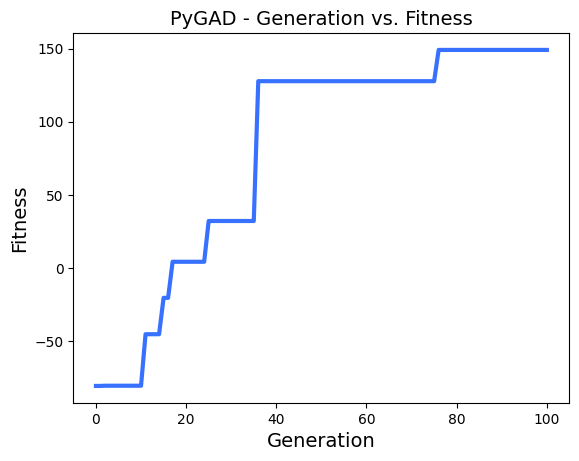

In [13]:
# After the generations complete, some plots are showed that summarize how the outputs/fitenss values evolve over generations.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
ga_instance.plot_fitness()

plt.show()

In [14]:
env = gym.make("LunarLander-v2", render_mode="human")
env.reset(seed=42)

for i in range(len(solution)):
    action = solution[i]
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset(seed=42)
        break
env.close()
print(solution)

[0 3 2 0 0 1 2 1 1 0 0 3 2 1 2 2 2 0 1 0 0 1 3 1 0 0 3 2 0 0 3 2 1 2 2 2 1
 1 2 2 0 3 2 0 0 2 0 2 1 1 2 1 3 1 0 0 0 1 3 2 1 1 2 2 2 2 3 0 1 3 0 1 2 3
 2 3 0 3 0 2 3 2 3 0 0 2 0 3 0 3 1 1 2 1 3 1 1 2 1 1 2 1 2 0 3 0 1 0 0 0 0
 1 3 1 2 0 0 2 2 1 1 2 0 1 2 3 0 2 3 3 0 0 0 1 1 2 0 0 0 2 2 2 2 0 2 3 1 2
 0 2 0 2 1 1 0 2 2 3 0 1 2 2 0 1 0 1 3 1 2 3 1 3 3 0 0 1 3 0 0 3 1 0 3 1 0
 3 2 2 0 3 0 0 0 3 3 3 0 2 1 3 0 3 1 3 0 1 2 2 1 0 1 3 0 3 1 3 2 3 1 0 0 2
 2 3 2 1 2 2 3 3 1 1 3 0 1 3 1 3 0 1 2 1 0 0 3 2 0 2 2 3]
